In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_excel("/Users/sahithi/Desktop/iris.xls")

In [7]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

# 2. Do necessary pre-processing steps

In [13]:
for i in ['SL', 'SW', 'PL']:
    df[i]=df[i].fillna(df[i].median())

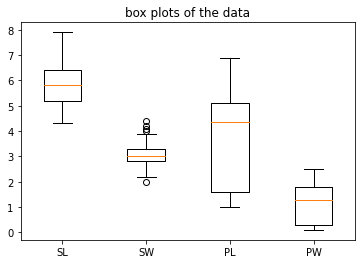

In [14]:
plt.figure()
plt.boxplot(df[['SL', 'SW', 'PL', 'PW']],labels=['SL', 'SW', 'PL', 'PW'])
plt.title('box plots of the data')
plt.show()

we have a few outliers here. 

In [16]:
q1=np.percentile(df['SW'],25,interpolation='midpoint')
q2=np.percentile(df['SW'],50,interpolation='midpoint')
q3=np.percentile(df['SW'],75,interpolation='midpoint')
print(q1)
print(q2)
print(q3)

2.8
3.0
3.25


In [20]:
IQR=q3-q1
LW=q1-1.5*IQR
UP=q3+1.5*IQR
print(LW,UP)

2.1249999999999996 3.9250000000000003


In [22]:
outlier=[]
for x in df['SW']:
    if((x>UP)or(x<LW)):
        outlier.append(x)

In [23]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [25]:
ind=(df['SW']>UP)|(df['SW']<LW)
dt=df.loc[ind].index
df.drop(dt,inplace=True)

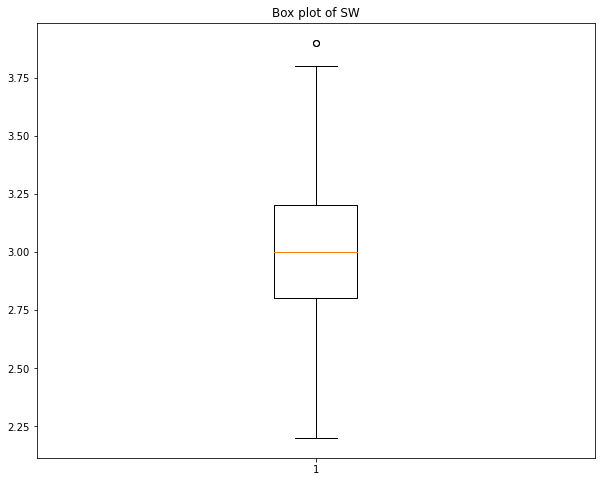

In [26]:
plt.figure(figsize=(10,8))
plt.boxplot(df['SW'])
plt.title('Box plot of SW')
plt.show()

In [28]:
outlier1=[]
for x in df['SW']:
    if((x>=UP)or(x<=LW)):
        outlier.append(x)

In [29]:
outlier1

[]

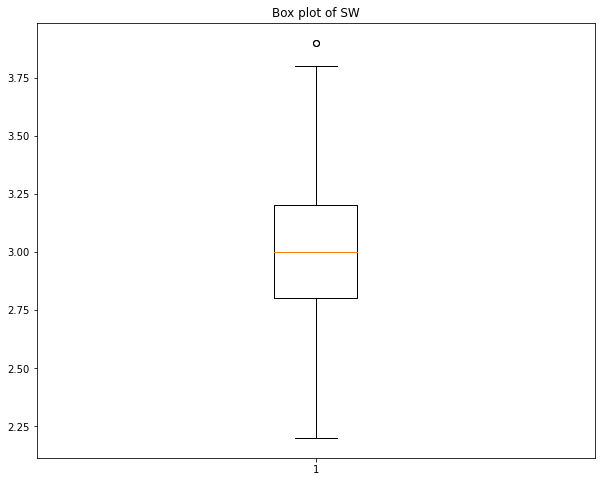

In [30]:
plt.figure(figsize=(10,8))
plt.boxplot(df['SW'])
plt.title('Box plot of SW')
plt.show()

there is one outlier left.

Label encoding

In [31]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
    df[a[i]]=label_en.fit_transform(df[a[i]])

#  Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [32]:
x=df.drop(['Classification'],axis=1)
y=pd.DataFrame(df['Classification'])

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [63]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

# logistic regression 

In [36]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9545454545454546
precision score: 0.9500891265597149
recall_score: 0.9500891265597149
f1 score: 0.9500891265597149


In [37]:
confusion_matrix(y_test,y_pred)


array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 16]])

# Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [39]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))
print('confusion_matrix:',confusion_matrix(y_test,y_pred))

accuracy is: 0.9545454545454546
precision score: 0.9500891265597149
recall_score: 0.9500891265597149
f1 score: 0.9500891265597149
confusion_matrix: [[16  0  0]
 [ 0 10  1]
 [ 0  1 16]]


# Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [41]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9545454545454546
precision score: 0.9500891265597149
recall_score: 0.9500891265597149
f1 score: 0.9500891265597149


In [42]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 16]])

In [46]:
#lets do fine tuning or hyper parameters

In [43]:
rft=RandomForestClassifier(n_estimators=200,max_depth=10,random_state=42,criterion='entropy')

In [65]:
rft.fit(x_train,y_train)
y_pred=rft.predict(x_test)

In [45]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9545454545454546
precision score: 0.9500891265597149
recall_score: 0.9500891265597149
f1 score: 0.9500891265597149


we are getting the same accuracy so lets try gradient boosting

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)

In [48]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))


accuracy is: 0.9545454545454546
precision score: 0.9500891265597149
recall_score: 0.9500891265597149
f1 score: 0.9500891265597149


the accuracy is same with all the classifiers

# SVM

In [67]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [51]:
    print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9545454545454546
precision score: 0.9500891265597149
recall_score: 0.9500891265597149
f1 score: 0.9500891265597149


polinomial svm


In [68]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)

In [53]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9545454545454546
precision score: 0.9500891265597149
recall_score: 0.9500891265597149
f1 score: 0.9500891265597149


In [69]:
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)

In [55]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))


accuracy is: 0.9318181818181818
precision score: 0.9236111111111112
recall_score: 0.93048128342246
f1 score: 0.9262187088274044


# KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

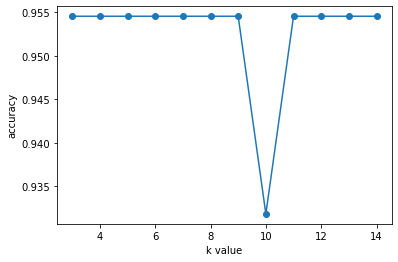

In [57]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [71]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [59]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9545454545454546
precision score: 0.9500891265597149
recall_score: 0.9500891265597149
f1 score: 0.9500891265597149


In [60]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 16]])

# Standardizing the features

In [72]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [73]:
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [75]:
#standardisation of logistics regression

In [74]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9772727272727273
precision score: 0.9814814814814815
recall_score: 0.9696969696969697
f1 score: 0.9746031746031746


after standardisation we got an accuracy of 97 percent

In [76]:
# standardising of random forest

In [77]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [78]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9318181818181818
precision score: 0.9296296296296296
recall_score: 0.9197860962566846
f1 score: 0.9238095238095237


accuracy is 93% after standardising

In [79]:
# standardising of svm

In [80]:
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [81]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9772727272727273
precision score: 0.9814814814814815
recall_score: 0.9696969696969697
f1 score: 0.9746031746031746


again accuracy is 97% after standardisation

In [83]:
# standardising of decision tree

In [82]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [84]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9318181818181818
precision score: 0.9296296296296296
recall_score: 0.9197860962566846
f1 score: 0.9238095238095237


In [85]:
# standardising KNN

In [86]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)


In [87]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))


accuracy is: 0.9772727272727273
precision score: 0.9814814814814815
recall_score: 0.9696969696969697
f1 score: 0.9746031746031746


HERE ALSO THE ACCURACY IS 97%